<a href="https://colab.research.google.com/github/ragoans/AnaliseDeChurn/blob/main/D06_An%C3%A1liseDeChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 06 - Análise de Churn

## Contexto

A análise a ser realizada parte da preocupação da diretoria com o aumento do índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça, e com base nessa informação tomar ações para reduzir o índice de Churn.

Para que seja possível a análise a empresa forneceu uma base de dados em formato ".csv" contendo dados dos clientes e das desistências ocorridas. A base é compostas pelas seguintes *features*:


*   client_id: Código de identificação do cliente;
*   age: Idade do cliente;
*   gender: Gênero do cliente;
*   region: Região de origem do cliente;
*   subscription_days: Dias de assinatura ativa do cliente;
*   subscription_type: Tipo de conta;
*   num_contents: Quantidade de conteúdos assistidos;
*   avg_rating: Avaliação média dos conteúdos da plataforma;
*   num_active_profiles: Número de perfis ativos na plataforma;
*   num_streaming_services: Quantidade de serviços de streaming que o cliente possui;
*   devices_connected: Quantidade de dispositivos conectados à conta;
*   churned: Se o cliente cancelou a conta ou não.

## Objetivo

O objetivo da presente análise é explorar os dados para entender melhor a situação dos índices atuais de Churn e em especial, criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar sua assinatura na plataforma ou não.

## Premissas

### Tratamento de dados

O tratamento de dados nulos ou faltantes, será realizado de acordo com a análise exploratória. Para a facilitação da interpretação dos dados pelos modelos, será utilizado para os dados categóricos a codificação One-Hot, por meio da própria biblioteca Pandas. Para a separação de dados de treino e teste, será utilizada a bibliteca "train_test_split" do Scikitlearn.

### Representações gráficas

Para a representação gráfica das análises exploratórias serão utilizadas as bibliotecas "seaborn" e "matplotlib.pyplot'

### Modelos propostos

 Para a modelagem serão adotados os modelos "LogisticRegression" e "RandomForestClassifier", ambas bibliotecas do Scikitlearn, e que perfomam bem para modelos classificatórios.

 Para o tunning de hiperparâmetros será utilizada a biblioteca "GridSearchCV", para ambos os modelos, sendo os parâmetros escolhidos depois de realizada a análise exploratória inicial e realizado o tratamento inicial dos dados. A métrica para aplicação da otimização de modelo será a Área sob a Curva ROC (Receiver Operating Characteristic).

 Para a análise dos resultados será plotado e analisada a Matriz de Confusão por meio da biblioteca "ConfusionMatrixDisplay" e "confusion_matrix".Para a verifação das métricas serão utilizadas as biblitotecas do Scikitlearn: "accuracy_score","balanced_accuracy_score", "precision_score", "recall_score", "f1_score", "roc_auc_score", para avaliar a acurácia, acurácia balanceada, precisão, recall, score f1 e a Área sob a Curva ROC, que são métricas comuns para modelos classificatórios.

 O modelo será considerado bem performado se alcançar valores de Área sob a Curva ROC superiores a 0,8.

 A documentação específica para as bibliotecas utilizadas está presento no item "Referências e Documentação"


 ## Referências e Documentação

*   pandas: https://pandas.pydata.org/docs/;
*   numpy: https://numpy.org/doc/stable/reference/;
*   seaborn: https://seaborn.pydata.org/api.html
*   matplotlib.pyplot: https://matplotlib.org/stable/api/pyplot_summary.html
*   train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
*   LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
*   RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
*   Métricas: https://scikit-learn.org/stable/modules/model_evaluation.html
*   GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Análise exploratória e tratamento dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (ConfusionMatrixDisplay,
                             confusion_matrix,
                             accuracy_score,
                             balanced_accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score)
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/content/drive/MyDrive/#databases/streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [4]:
# Quantificando dados duplicados

df.duplicated(keep=False).sum()

24806

* Valor superior ao total de itens do dataset, portanto existem dados duplicados.

In [5]:
# Identificando dados duplicados
(
  df
  .groupby(df.columns.tolist(), dropna=False)
  .size()
  .to_frame('n_duplicates')
  .query('n_duplicates > 1')
  .sort_values('n_duplicates', ascending=False)
  .head()
)

n_duplicates
Age  Gender Time_on_platform Devices_connected Subscription_type Num_streaming_services Num_active_profiles Avg_rating Churned User_id                                           
18.0 Female 174.0            4.0               Basic             NaN                    1                   4.91       0.0     5caf911f-7e3e-41fe-81e8-b92c1486d511             2
58.0 Female 7680.0           2.0               NaN               NaN                    5                   NaN        0.0     43891e92-ae54-45ac-b180-52d9563b29fc             2
            NaN              NaN               Premium           NaN                    2                   2.82       0.0     3be60fd4-f7a7-4f6a-ab97-fd53f8c7e565             2
                                               Standard          NaN                    1                   1.35       NaN     dd987b62-33cc-44bb-8b2c-102dee37def3             2
                                                                                        2                   NaN        NaN     1f7035d1-82b2-4b9d-ab05-259b04d0b264             2

* Optou-se pelo drop de colunas duplicadas devido à natureza única de ID de usuário.

In [6]:
# Drop de linhas duplicadas

df = df.drop_duplicates()

In [7]:
# Quantidade de dados nulos por coluna
df.isna().sum()

Age                        9508
Gender                    12164
Time_on_platform          17965
Devices_connected         21185
Subscription_type         21180
Num_streaming_services    57392
Num_active_profiles           0
Avg_rating                14501
Churned                   14105
User_id                       0
dtype: int64

In [8]:
# Identificando valores nulos
df_missing = (
  df
  .isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format ('{:.2%}', subset=['missing_pct'])


,missing_count,missing_pct
Num_streaming_services,57392,87.65%
Devices_connected,21185,32.35%
Subscription_type,21180,32.35%
Time_on_platform,17965,27.44%
Avg_rating,14501,22.15%
Churned,14105,21.54%
Gender,12164,18.58%
Age,9508,14.52%
Num_active_profiles,0,0.00%
User_id,0,0.00%


* Conforme percebido existem uma quantidade considerável de dados nulos no database.

* Nas colunas "Time_on_platform", "Num_streaming_services", "Churned", "Avg_rating" e "Devices_connected" serão substituídos os valores nulos por 0.

In [9]:
# Substituição de nulos por 0 nas colunas
df = df.fillna({'Time_on_platform': 0, 'Num_streaming_services': 1, 'Churned': 0, 'Avg_rating': df.Avg_rating.mean(), 'Devices_connected': 1})
df.isna().sum()

Age                        9508
Gender                    12164
Time_on_platform              0
Devices_connected             0
Subscription_type         21180
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64

* Para os dados faltantes, optou-se pelo drop das colunas por possível problema de cadastro.

In [10]:
# Drop de colunas nulas restantes
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30739 entries, 0 to 65479
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     30739 non-null  float64
 1   Gender                  30739 non-null  object 
 2   Time_on_platform        30739 non-null  float64
 3   Devices_connected       30739 non-null  float64
 4   Subscription_type       30739 non-null  object 
 5   Num_streaming_services  30739 non-null  float64
 6   Num_active_profiles     30739 non-null  int64  
 7   Avg_rating              30739 non-null  float64
 8   Churned                 30739 non-null  float64
 9   User_id                 30739 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.6+ MB


In [11]:
# Verificando quantidade de Gender para evitar duplicidade por erro de entrada
df['Gender'].nunique()

2

As seguintes conversões de tipo de variável são propostas:
* Age: float --> int
* Time_on_platform --> int
* Devices_connected --> int
* Num_streaming_services --> int
* Num_active_profiles --> int
* Churned: Alterar valores de 0 e 1 para "Yes" ou "No" e para object

In [15]:
df['Age'] = df['Age'].astype(int).copy()
df['Time_on_platform'] = df['Time_on_platform'].astype(int).copy()
df['Devices_connected'] = df['Devices_connected'].astype(int).copy()
df['Num_streaming_services'] = df['Num_streaming_services'].astype(int).copy()
df['Num_active_profiles'] = df['Num_active_profiles'].astype(int).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30739 entries, 0 to 65479
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     30739 non-null  int64  
 1   Gender                  30739 non-null  object 
 2   Time_on_platform        30739 non-null  int64  
 3   Devices_connected       30739 non-null  int64  
 4   Subscription_type       30739 non-null  object 
 5   Num_streaming_services  30739 non-null  int64  
 6   Num_active_profiles     30739 non-null  int64  
 7   Avg_rating              30739 non-null  float64
 8   Churned                 30739 non-null  float64
 9   User_id                 30739 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 2.6+ MB


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,30739.0,43.522659,15.087449,18.0,30.00,43.000000,57.00,69.0
Time_on_platform,30739.0,3171.178373,2908.445004,0.0,0.00,2713.000000,5741.00,8759.0
Devices_connected,30739.0,2.363187,1.493010,1.0,1.00,2.000000,4.00,5.0
Num_streaming_services,30739.0,1.186245,0.631157,1.0,1.00,1.000000,1.00,4.0
Num_active_profiles,30739.0,2.990956,1.413333,1.0,2.00,3.000000,4.00,5.0
Avg_rating,30739.0,3.002054,1.016545,1.0,2.29,3.003855,3.71,5.0
Churned,30739.0,0.194053,0.395476,0.0,0.00,0.000000,0.00,1.0


- As médias bastante próximas aos quantis de 50% não demonstram possibilidade de outliers.

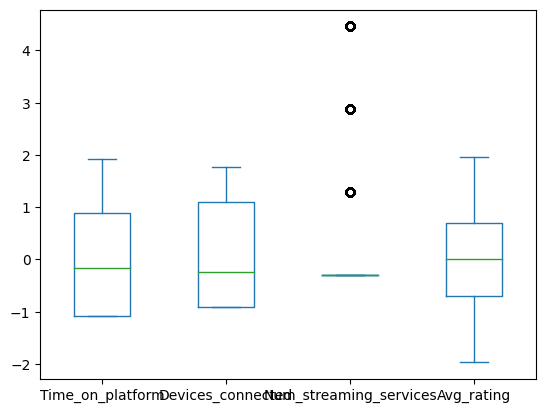

In [17]:
# Plot.box para ver outliers possíveis
df_num = df[['Time_on_platform',
             'Devices_connected',
             'Num_streaming_services',
             'Num_active_profiles',
             'Num_active_profiles',
             'Avg_rating']]
df_num.apply(scale).plot.box();

In [18]:
# Verificação Coluna Num_streaming_services
agg_NumStream = df.groupby('Num_streaming_services')['User_id'].count()
agg_NumStream

Num_streaming_services
1    27857
2      989
3      943
4      950
Name: User_id, dtype: int64

In [19]:
# Trocando 0 e 1 em Churn por Yes ou No

df['Churned'] = df['Churned'].replace([0,1],['No','Yes'])
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,1,3,3.003855,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,1,1,2.140000,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1.910000,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,1,2,3.003855,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,1,1,3.003855,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [20]:
# Número total de Churns

agg_churn = df.groupby('Churned')['User_id'].count().reset_index()
agg_churn['porcentagem'] = agg_churn['User_id'] / len(df) * 100
agg_churn

,Churned,User_id,porcentagem
0,No,24774,80.594684
1,Yes,5965,19.405316


* Conforme visto não temos uma quantidade bastante uniforme de respostas na variável target.

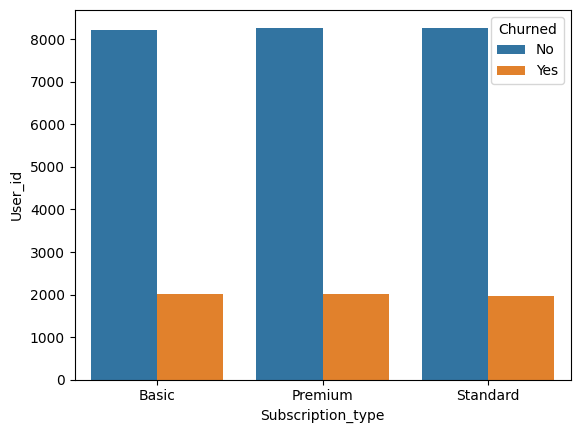

In [21]:
# Churn por Subscription_type

agg_sub = df.groupby(['Churned', 'Subscription_type'])['User_id'].count().reset_index()
sns.barplot(data=agg_sub,x='Subscription_type',y='User_id', hue='Churned');

* Conforme visto não há correlação direta entre o tipo de Subscription com o número de Churns.

In [22]:
# Idade dos usuários

agg_age_count = df.groupby(['Age'])['User_id'].count().reset_index()
agg_age_count.transpose()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
Age,18,19,20,21,22,23,24,25,26,27,...,60,61,62,63,64,65,66,67,68,69
User_id,600,575,640,573,588,580,601,630,615,601,...,569,594,568,634,588,619,613,598,601,634


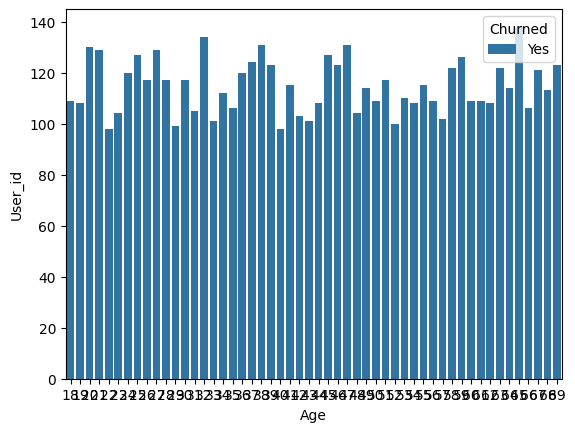

In [23]:
# Churn por idade

agg_age = df.groupby(['Churned', 'Age'])['User_id'].count().reset_index()
mask = agg_age['Churned'] != 'No'
agg_age = agg_age[mask]
sns.barplot(data=agg_age,x='Age',y='User_id', hue='Churned');

* Churn bastante distribuído pela idade.

# Modelagem dos Dados

In [25]:
# Separação de bases de treino e teste
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df.Churned)
df.Churned = le.transform(df.Churned)

X = df.drop(columns=['User_id', 'Churned'])
y = df['Churned']

le.fit(X.Gender)
X.Gender = le.transform(X.Gender)

le.fit(X.Subscription_type)
X.Subscription_type = le.transform(X.Subscription_type)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)



In [26]:
# Aplicando padronização de dados

scaler = StandardScaler()
scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)


array([[-0.17061315, -0.99967473,  1.73949874, ..., -0.29433029,
         0.71698567,  0.33748643],
       [-1.56097429,  1.00032538, -1.08354131, ..., -0.29433029,
        -0.69778627,  1.15356033],
       [ 1.219748  ,  1.00032538, -0.12178211, ..., -0.29433029,
        -0.69778627, -0.00285096],
       ...,
       [ 0.02800987, -0.99967473, -1.08354131, ..., -0.29433029,
         0.0095997 , -0.00285096],
       [-0.63406686, -0.99967473, -1.08354131, ..., -0.29433029,
         0.71698567, -0.60640628],
       [-0.23682082, -0.99967473,  1.88254194, ..., -0.29433029,
         0.0095997 ,  0.71111062]])

In [27]:
# Aplicando Modelo Logístico

lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train, y_train)

y_lr = lr.predict(X_test)

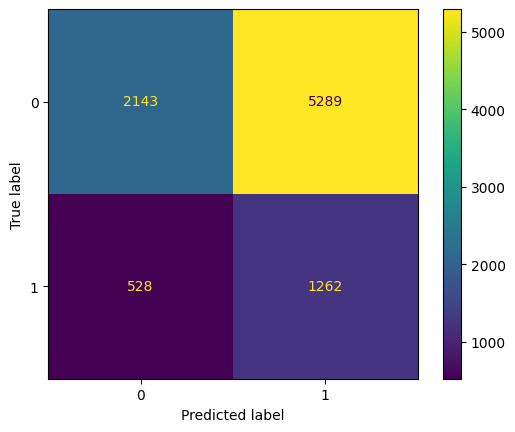

In [28]:
# Matriz de confusão

cm_lr = confusion_matrix(y_test, y_lr,labels=lr.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)

disp.plot()
plt.show()

In [29]:
# Verificando métricas

# Verificando métricas teste
print('SCORES TESTE - DEFAULT')
print('='*50)
print(f'Accuracy: {accuracy_score(y_test, y_lr)}')
print('='*50)
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_lr)}')
print('='*50)
print(f'Precision: {precision_score(y_test, y_lr)}')
print('='*50)
print(f'Recall: {recall_score(y_test, y_lr)}')
print('='*50)
print(f'F1: {f1_score(y_test, y_lr)}')
print('='*50)
print(f'ROC: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')
print('='*50)

SCORES TESTE - DEFAULT
Accuracy: 0.36922576447625244
Balanced Accuracy: 0.49668780932221224
Precision: 0.1926423446802015
Recall: 0.7050279329608938
F1: 0.3026016065219998
ROC: 0.5001411681931073


In [30]:
# Otimização por GridSearchCV

parameters = {
    'class_weight' : ['balanced'],
    'C': [0.5, 0.75, 1],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 150]
}

grid_lr = GridSearchCV(lr, parameters, scoring='roc_auc', cv=5, n_jobs=-1)

grid_lr.fit(X_train, y_train)

results = pd.DataFrame(grid_lr.cv_results_)
results.sort_values(by='rank_test_score').head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.123496,0.008789,0.007071,0.000426,0.75,balanced,100,liblinear,"{'C': 0.75, 'class_weight': 'balanced', 'max_i...",0.502761,0.505271,0.514000,0.501429,0.500435,0.504779,0.004888,1
21,0.135281,0.019408,0.007329,0.000482,0.75,balanced,150,liblinear,"{'C': 0.75, 'class_weight': 'balanced', 'max_i...",0.502761,0.505271,0.514000,0.501429,0.500435,0.504779,0.004888,1
13,0.127009,0.009183,0.007775,0.000730,0.75,balanced,50,liblinear,"{'C': 0.75, 'class_weight': 'balanced', 'max_i...",0.502761,0.505271,0.514000,0.501429,0.500435,0.504779,0.004888,1
33,0.128837,0.009326,0.007061,0.000425,1,balanced,150,liblinear,"{'C': 1, 'class_weight': 'balanced', 'max_iter...",0.502728,0.505286,0.514019,0.501420,0.500437,0.504778,0.004899,4
29,0.124996,0.009955,0.007071,0.000409,1,balanced,100,liblinear,"{'C': 1, 'class_weight': 'balanced', 'max_iter...",0.502728,0.505286,0.514019,0.501420,0.500437,0.504778,0.004899,4


In [31]:
parameters_best = grid_lr.best_estimator_.get_params()
parameters_best

{'C': 0.75,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 50,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [32]:
lr = LogisticRegression(class_weight='balanced',C=0.75,solver='liblinear',max_iter=50)

lr.fit(X_train, y_train)

y_lr = lr.predict(X_test)

In [33]:
# Verificando métricas

# Verificando métricas teste
print('SCORES TESTE - TUNNADO')
print('='*50)
print(f'Accuracy: {accuracy_score(y_test, y_lr)}')
print('='*50)
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_lr)}')
print('='*50)
print(f'Precision: {precision_score(y_test, y_lr)}')
print('='*50)
print(f'Recall: {recall_score(y_test, y_lr)}')
print('='*50)
print(f'F1: {f1_score(y_test, y_lr)}')
print('='*50)
print(f'ROC: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')
print('='*50)

SCORES TESTE - TUNNADO
Accuracy: 0.5428323574062025
Balanced Accuracy: 0.49116142785839284
Precision: 0.18753219989696032
Recall: 0.40670391061452515
F1: 0.2566995768688293
ROC: 0.482333078759524


In [34]:
# Aplicando Modelo RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')

rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)

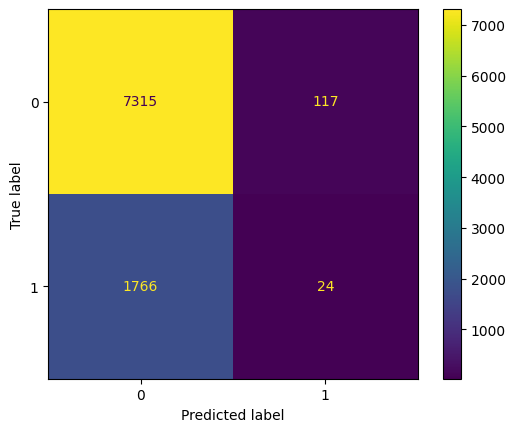

In [35]:
# Matriz de confusão

cm_rf = confusion_matrix(y_test, y_rf,labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)

disp.plot()
plt.show()

In [36]:
# Verificando métricas

# Verificando métricas teste
print('SCORES TESTE')
print('='*50)
print(f'Accuracy: {accuracy_score(y_test, y_rf)}')
print('='*50)
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_rf)}')
print('='*50)
print(f'Precision: {precision_score(y_test, y_rf)}')
print('='*50)
print(f'Recall: {recall_score(y_test, y_rf)}')
print('='*50)
print(f'F1: {f1_score(y_test, y_rf)}')
print('='*50)
print(f'ROC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}')
print('='*50)

SCORES TESTE
Accuracy: 0.7958143569724572
Balanced Accuracy: 0.49883254355316886
Precision: 0.1702127659574468
Recall: 0.013407821229050279
F1: 0.024857586742620404
ROC: 0.5046011585112844


In [37]:
parameters_rf = {
    'class_weight' : ['balanced', 'balanced_subsample'],
    'n_estimators': [50, 100, 150, 200, 250],
}

grid_rf = GridSearchCV(rf, parameters_rf, scoring='roc_auc', cv=5, n_jobs=-1)

grid_rf.fit(X_train, y_train)

results = pd.DataFrame(grid_rf.cv_results_)
results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,4.245211,0.516713,0.192552,0.060291,balanced_subsample,100,"{'class_weight': 'balanced_subsample', 'n_esti...",0.510077,0.492741,0.504085,0.496770,0.479240,0.496583,0.010526,1
4,9.518980,1.216430,0.400115,0.009482,balanced,250,"{'class_weight': 'balanced', 'n_estimators': 250}",0.499406,0.496830,0.504181,0.497342,0.479648,0.495481,0.008331,2
5,2.747605,0.739993,0.114095,0.039391,balanced_subsample,50,"{'class_weight': 'balanced_subsample', 'n_esti...",0.504642,0.487305,0.508035,0.501492,0.474264,0.495148,0.012602,3
9,11.270119,1.530617,0.415363,0.083407,balanced_subsample,250,"{'class_weight': 'balanced_subsample', 'n_esti...",0.502763,0.487737,0.502457,0.494992,0.484873,0.494564,0.007352,4
3,7.914392,0.915789,0.369629,0.096300,balanced,200,"{'class_weight': 'balanced', 'n_estimators': 200}",0.506333,0.490596,0.503336,0.491655,0.479990,0.494382,0.009507,5


In [38]:
parameters_best = grid_rf.best_estimator_.get_params()
parameters_best

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
# Aplicando Modelo RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced',n_estimators=100)

rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)

In [40]:
# Verificando métricas

# Verificando métricas teste
print('SCORES TESTE')
print('='*50)
print(f'Accuracy: {accuracy_score(y_test, y_rf)}')
print('='*50)
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_rf)}')
print('='*50)
print(f'Precision: {precision_score(y_test, y_rf)}')
print('='*50)
print(f'Recall: {recall_score(y_test, y_rf)}')
print('='*50)
print(f'F1: {f1_score(y_test, y_rf)}')
print('='*50)
print(f'ROC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}')
print('='*50)

SCORES TESTE
Accuracy: 0.7961396660160486
Balanced Accuracy: 0.499034373477819
Precision: 0.17391304347826086
Recall: 0.013407821229050279
F1: 0.024896265560165973
ROC: 0.5005467448629211


In [41]:
# Verificando features mais impactantes no modelo

importance = pd.DataFrame({'Variável': X_train.columns, 'Importância': rf.feature_importances_})
importance = importance.sort_values(by='Importância', ascending=False).reset_index()
importance.head()

,index,Variável,Importância
0,7,Avg_rating,0.279101
1,2,Time_on_platform,0.255539
2,0,Age,0.253361
3,6,Num_active_profiles,0.064449
4,3,Devices_connected,0.062200


* Conforme percebido o modelo que melhor performou foi o de RandomForestClassifier().

* Um dos motivos é a melhor capacidade de lidar com bases desbalanceadas, o que é o caso da presente base em que somente, aproximadamente, 20% dos dados apontavam para Churn.

* Por meio do tunning foi possível manter a acurácia do modelo e aumentar um pouco a taxa de ROC.

* Além disto foi possível verificar as três variáveis com maior impacto no modelo que são as avaliações o tempo na plataforma e a idade.

# Conclusão

No presente Case foi possível realizar as análises exploratórias e realizar o tratamento dos dados.

Foi encontrado uma grande quantidade de dados nulos e seria interessante identificar o motivo, pois são elementos importantes para uma melhor performance do modelo.

Mesmo assim foi possível determinar um modelo de previsão com acurácia média de 79% e taxa de ROC de aproximadamente 0.51, o que é considerado satisfatório, mas recomendado uma futura análise para melhoras nas quantidades de acerto.

Isto inclui análise com a retirada de algumas features, em especial as em que foi utilizada a substituição de dados por não possuírem preenchimento, ou mesmo das que tiveram pouco impacto na análise.

Além disto, foi possível definir que as variáveis mais impactantes no modelo foram a idade, o tempo na plataforma, e em especial a avaliação do usuário. Isto reflete na adaptação das políticas da empresa para lidar com esta situação.

Algumas das estratégias podem incluir a adaptação dos conteúdos para perfis mais aderentes ao público alvo, melhorar a apresentação de materiais para aumentar o tempo gasto na plataforma, dando ao usuário a sensação de compensação do valor investido na inscrição, e uma maior diversificação no conteúdo trazido na plataforma.